# A tiny model to explain the QML principles using PennyLane

_This notebook explores the creation and use of a very simple model in **PennyLane and PyTorch**_.

**By:** Jacob Cybulski ([website](https://jacobcybulski.com/))<br>
**Date:** March 26, 2025<br>
**Updates:** April 8, 2025<br>
**Aims:** To develop a tiny quantum model in PennyLane to explain QML principles<br/>
**License:** 
This project is licensed under the [GPL-3.0](https://www.gnu.org/licenses/gpl-3.0.txt)<br>
**Changes:** All changes to this code must be listed at the bottom of this notebook

## Libraries

In [1]:
import sys
sys.path.append('.')
sys.path

['/home/jacob/miniconda3/lib/python311.zip',
 '/home/jacob/miniconda3/lib/python3.11',
 '/home/jacob/miniconda3/lib/python3.11/lib-dynload',
 '',
 '/home/jacob/miniconda3/lib/python3.11/site-packages',
 '.']

In [2]:
### General libraries

import matplotlib.pyplot as plt
from matplotlib import set_loglevel
set_loglevel("warning")

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
### Import utilities
from utilities import *

In [4]:
### PennyLane and Torch

import pennylane as qml
from pennylane import numpy as np
from pennylane import NesterovMomentumOptimizer
from torch import nn
from torch.autograd import Variable
import torch

## Explore a PennyLane tiny quantum model

We will first identify what quantum devices and gradient support we have, then we will show the principles of working with PennyLane, then prepare data for model training and testing, create a quantum model, and finally train it and test it.

### Define device to compute on

In [5]:
### Select a device for PL operation

# Quantum simulator
sim = 'default.qubit' # default.qubit lightning.qubit lightning.gpu

### Show QML principles with PennyLane

#### Set up our data

In [6]:
### Test data
#   Note that 'np' is from PennyLane, so it is automatically a tensor!
#   However, it is always better to explicitly convert Numpy array to tensors

inputs = np.array([np.pi*0.7, np.pi/4], requires_grad=False)   # Plain values
weights = np.array([1.7, 0.5, 0.5], requires_grad=True)        # Parameters with gradients

### This is our data
inputs

tensor([2.19911486, 0.78539816], requires_grad=False)

In [7]:
weights

tensor([1.7, 0.5, 0.5], requires_grad=True)

#### First circuit

In [8]:
### Simple circuit creation and execution
dev = qml.device(sim, wires=2, shots=1000) # default.qubit

@qml.qnode(dev)
def circuit(inputs, weights):
    
    # Feature map
    qml.RY(inputs[0], wires=0)
    qml.RY(inputs[1], wires=1)
    qml.Barrier()

    # Ansatz
    qml.RX(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(weights[2], wires=1)
    qml.Barrier()

    # Measurement
    return qml.probs(wires=range(2))

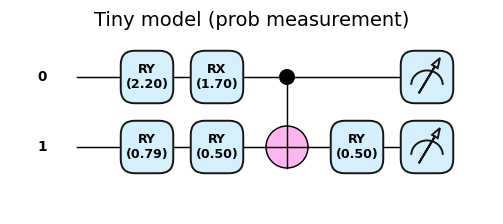

In [9]:
### Plot the circuit
draw_circuit(circuit, scale=0.7, title='Tiny model (prob measurement)', style='pennylane')(inputs, weights)

In [10]:
### Run the circuit
results = circuit(inputs, weights)
results

array([0.221, 0.318, 0.054, 0.407])

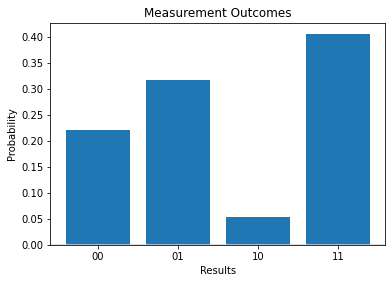

In [11]:
### Plot the results
plot_hist(results, figsize=(6, 4), title='Measurement Outcomes')

In [12]:
### Show gradients at each of the model parameters
qml.gradients.param_shift(circuit)(inputs, weights)

array([[ 0.1135, -0.2635, -0.2795],
       [ 0.165 ,  0.268 ,  0.254 ],
       [-0.033 ,  0.164 , -0.1565],
       [-0.2455, -0.1685,  0.182 ]])

#### The same circuit but measured differently
Expvals are weighted averages of *eigenvalues* of an operator.<br>
For a single qubit, possible measurements for $\vert 0 \rangle$ is $+1$ and for $\vert 1 \rangle$ is $-1$.<br>
Depending on the circuit state, repeated measurements the result will reflect its bias.

In [13]:
### Simple circuit creation and execution
dev = qml.device(sim, wires=2) # default.qubit

@qml.qnode(dev)
def circuit(inputs, weights):
    
    # Feature map
    qml.RY(inputs[0], wires=0)
    qml.RY(inputs[1], wires=1)
    qml.Barrier()

    # Ansatz
    qml.RX(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(weights[2], wires=1)
    qml.Barrier()

    # Measurement
    return [qml.expval(qml.PauliZ(m)) for m in range(2)]

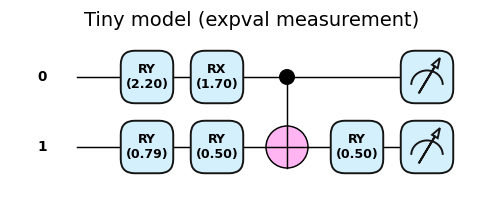

In [14]:
### Plot the circuit
draw_circuit(circuit, scale=0.7, title='Tiny model (expval measurement)', style='pennylane')(inputs, weights)

In [15]:
### Run the circuit
results = circuit(inputs, weights)
results

[tensor(0.07573289, requires_grad=True),
 tensor(-0.44132096, requires_grad=True)]

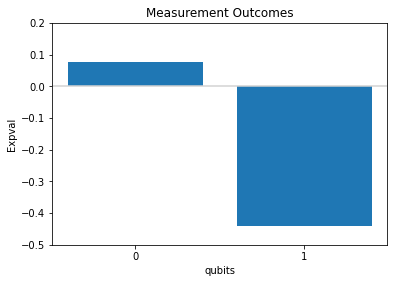

In [16]:
### Plot the results
plot_hist(results, figsize=(6, 4), labels=['0', '1'], ylim=(-0.5, 0.2), 
          xlabel='qubits', ylabel='Expval', title='Measurement Outcomes')

In [17]:
### Show gradients at each of the model parameters
qml.gradients.param_shift(circuit)(inputs, weights)

[tensor([ 5.82885951e-01, -5.55111512e-17,  2.77555756e-17], requires_grad=True),
 tensor([ 0.14401607, -0.1987507 , -0.85230624], requires_grad=True)]

## What's next?
*At this point you can to the more advanced QML models to learn how to optimise their parameters.*

## Modifications (do not remove)
Under the [Creative Commons CC-BY](https://creativecommons.org/licenses/by/4.0/) license, if you perform any changes to this notebook, please list them here, adding a note with your name, contact details, date and changes to the code.

- [Jacob Cybulski](http://jacobcybulski.com) (2024, 1 Oct): The author of this notebook added this section to record all code changes

## Systems in use

In [18]:
!pip list | grep -e PennyLane -e torch

PennyLane                 0.40.0
PennyLane_Lightning       0.40.0
torch                     2.6.0
torchaudio                2.6.0
torcheval                 0.0.7
torchmetrics              1.6.1
torchsummary              1.5.1
torchvision               0.21.0
